In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations', 
                 usecols=['name', 'group', 'year', 'value'])
df.head(3)

,name,group,year,value
0,Agra,India,1575,200.0
1,Agra,India,1576,212.0
2,Agra,India,1577,224.0


<BarContainer object of 10 artists>

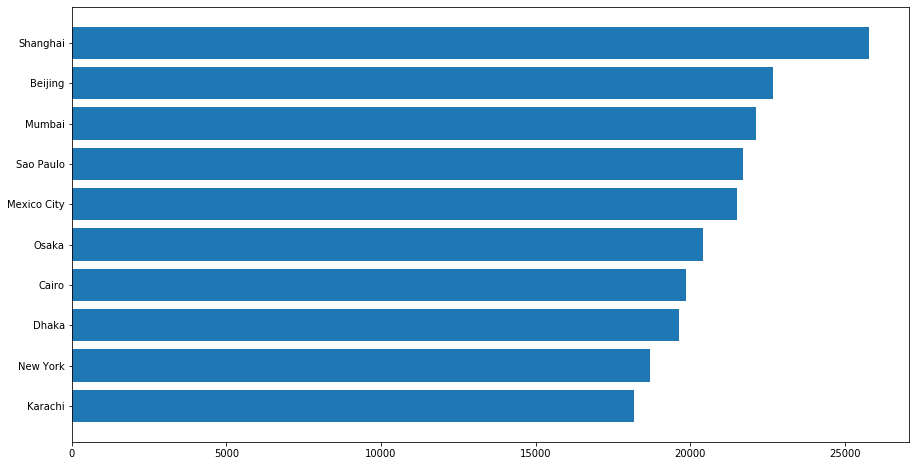

In [3]:
# Data Processing
current_year = 2018
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

{'Agra': 'India',
 'Ahmedabad': 'India',
 'Amsterdam': 'Europe',
 'Ayutthaya': 'Asia',
 'Beijing': 'Asia',
 'Berlin': 'Europe',
 'Bijapur': 'India',
 'Birmingham': 'Europe',
 'Boston': 'North America',
 'Buenos Aires': 'Latin America',
 'Cairo': 'Middle East',
 'Chicago': 'North America',
 'Cuttack': 'India',
 'Delhi': 'India',
 'Dhaka': 'Asia',
 'Edirne': 'Europe',
 'Esfahan': 'Middle East',
 'Fez': 'Middle East',
 'Gauda': 'India',
 'Guangzhou': 'Asia',
 'Hangzhou': 'Asia',
 'Istanbul': 'Europe',
 'Karachi': 'Asia',
 'Kolkatta': 'India',
 'Kyoto': 'Asia',
 'Lisbon': 'Europe',
 'London': 'Europe',
 'Los Angeles': 'North America',
 'Lucknow': 'India',
 'Manchester': 'Europe',
 'Mashhad': 'Middle East',
 'Mexico City': 'Latin America',
 'Moscow': 'Europe',
 'Mumbai': 'India',
 'Nanjing': 'Asia',
 'Naples': 'Europe',
 'New York': 'North America',
 'Osaka': 'Asia',
 'Paris': 'Europe',
 'Pegu': 'Asia',
 'Philadelphia': 'North America',
 'Rio de Janeiro': 'Latin America',
 'Saint Petersburg

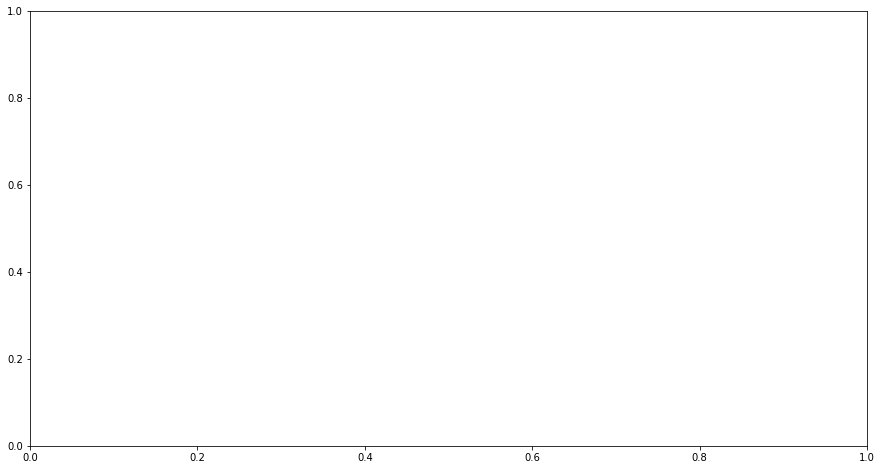

In [4]:
colors = dict(zip(
    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]
))
group_lk = df.set_index('name')['group'].to_dict()
fig, ax = plt.subplots(figsize=(15, 8))
group_lk

In [5]:
def draw_barchart(current_year):
    dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most populour cities in the world from 1500 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'Bar Chart', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    

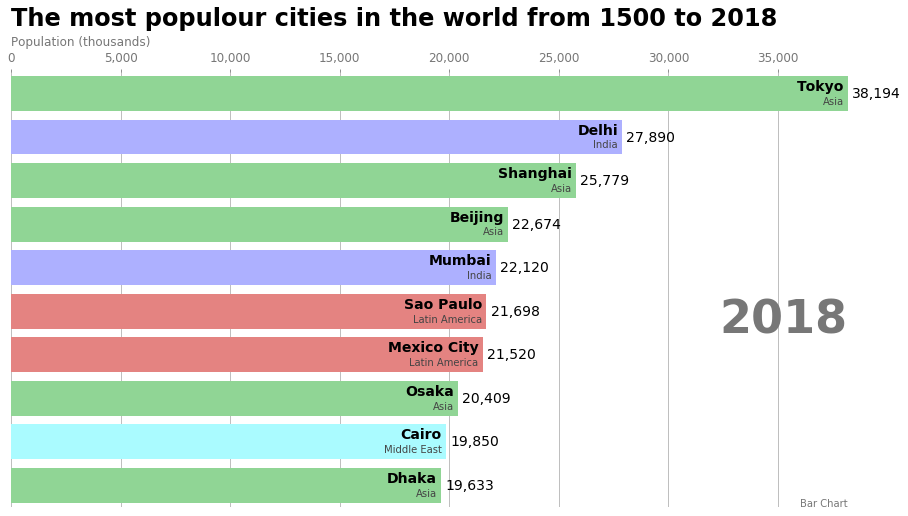

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2018)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1900, 2019))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or 

In [ ]:
animator.save("bar chart race.mp4")

In [ ]:
# animator.to_html5_video()

In [4]:
#read data

import pandas as pd
import random 
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime

random.seed(0) 
df = pd.read_csv("corona_virus_todays_data.csv")
NUM_COLORS = len(df['CountryExp'].unique())
print(df.columns)
remove_china = False
group_var = 'CountryExp'
value_var = 'NewConfCases'
df['DateRep'] = df['DateRep'].apply(lambda x: datetime.datetime.strptime(x , '%d %B %Y'))

Index(['DateRep', 'CountryExp', 'NewConfCases', 'NewDeaths', 'GeoId', 'EU'], dtype='object')


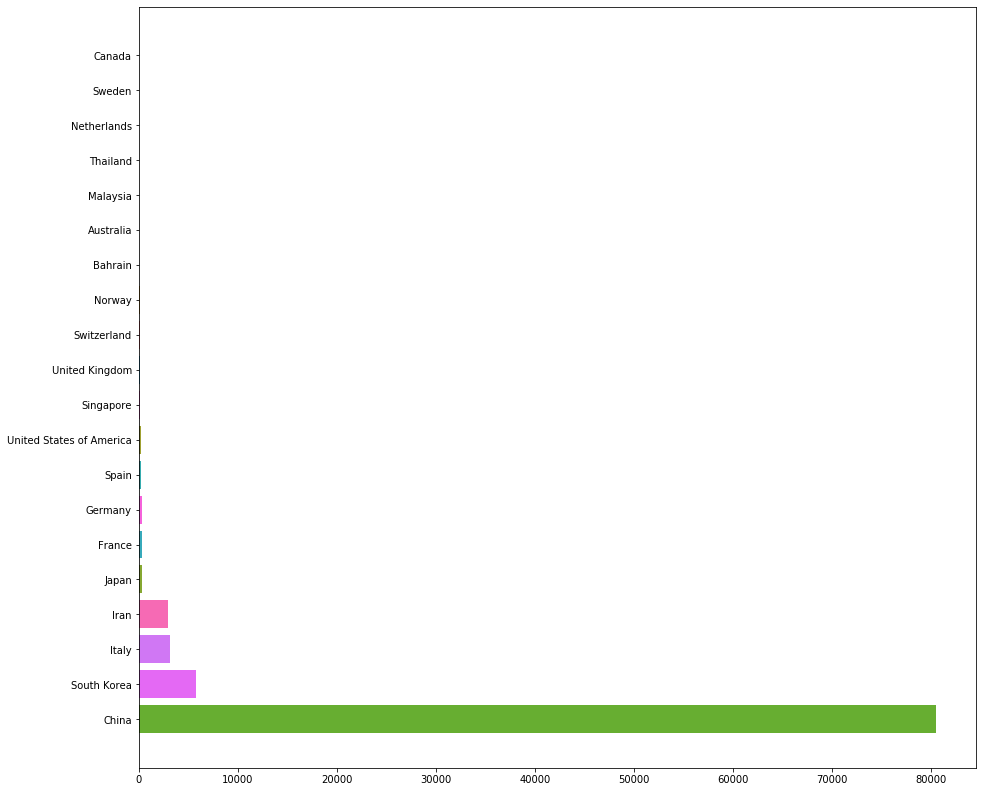

In [5]:
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)
colors = dict(zip(
    df['CountryExp'].unique(),
    clrs
))
df['no_cumulative'] = df.groupby([group_var])[value_var].apply(lambda x: x.cumsum())
df['total_deaths'] = df.groupby([group_var])['NewDeaths'].apply(lambda x: x.cumsum())
df['tot_cumsum'] =df[[value_var]].apply(lambda x: x.cumsum())

if (remove_china == True):
    df= df.query('CountryExp != "China"')
# df = df.drop_duplicates(['DateRep',group_var,'no_cumulative'])

current_date = '05 March 2020'
dff = (df[df['DateRep'].eq(current_date)]
       .sort_values(by='no_cumulative', ascending=False)
       .head(20))

group_lk = dff.set_index(group_var)[value_var].to_dict()
fig, ax = plt.subplots(figsize=(15, 14))
random.shuffle(clrs)
ax.barh(dff[group_var], dff['no_cumulative'],color = (list(clrs)))
colors = dict(zip(df['CountryExp'].unique()
    ,
    list(clrs)
))
# colors

In [9]:
# Uncomment the next two lines if you want to save the animation
#import matplotlib

matplotlib.use('Qt5Agg')
plt.style.use('seaborn')

# matplotlib.use("Agg")
import numpy
from matplotlib.pylab import *
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.animation as animation



# Sent for figure
font = {'size'   : 9}
matplotlib.rc('font', **font)

# Setup figure and subplots
f0 = figure(num = 0, figsize = (12, 8))#, dpi = 100)
f0.suptitle("Corona Virus Confirmed cases till date", fontsize=24)

# gs=GridSpec(5,2) 
ax1 = subplot2grid((10, 2), (1, 0), colspan=1, rowspan=3)
ax4 = subplot2grid((10, 2), (1, 1), colspan=1, rowspan=3)
ax2 = subplot2grid((10, 2), (5, 0), colspan=2, rowspan=1)
ax3 = subplot2grid((10, 2), (6, 0), colspan=2, rowspan=4)

tight_layout()

# gs.update(wspace = 0.5, hspace = 0.5)
# ax1=f0.add_subplot(gs[0:2,0]) # First row, first column
# ax2=f0.add_subplot(gs[2,:]) # First row, second column
# ax3=f0.add_subplot(gs[3:5,:]) # First row, third column

#tight_layout()

# Set titles of subplots
ax1.set_title('Position vs Time')

# Turn on grids
ax1.grid(True)

# set label names


# set lagends
# ax01.legend([p011,p012], [p011.get_label(),p012.get_label()])
# ax02.legend([p021,p022], [p021.get_label(),p022.get_3abel()])


def updateData(current_date):
 
    #line plot
    
    df_ax1= df[df['DateRep'] <= current_date]
    ax1.clear()
    ax1.plot(df_ax1['DateRep'],df_ax1['tot_cumsum'],'-')
    ax1.get_xaxis().set_ticks([])
    
    #plot for china
    df_china = df.query("(CountryExp == 'China') & (DateRep == @current_date)")
    ax2.clear()
    ax2.set_xlim(0,df['no_cumulative'].max())
    ax2.barh(df_china[group_var], df_china['no_cumulative'], color=['red'],height=0.1)
    dx = df_china['no_cumulative'].max() / 200
    for i, (value, name) in enumerate(zip(df_china['no_cumulative'], df_china[group_var])):
        ax2.text(value-dx, i,     name,size=8, weight=600, ha='right', va='bottom')
    #         ax.text(value-dx, i-.25, name, size=10, color='#444444', ha='right', va='baseline')
        ax2.text(value+dx, i,     f'{value:,.0f}',  size=8, ha='left',  va='center')
#     ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax2.xaxis.set_ticks_position('top')
    ax2.tick_params(axis='x', colors='#777777', labelsize=8)
    ax2.set_yticks([])
    ax2.margins(0, 0.01)
    ax2.grid(which='major', axis='x', linestyle='-')
    ax2.set_axisbelow(True)
#     ax3.text(0, 1.15, 'Corona Virus Confirmed cases till date',
#             transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax2.text(1, 0, 'Bar Chart', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    
    dff_tot = df[df['DateRep'].eq(current_date)].sort_values(by='no_cumulative', ascending=True)
    dff = dff_tot.query("CountryExp != 'China'").tail(12)
    ax3.clear()
    ax3.barh(dff[group_var], dff['no_cumulative'], color=[colors[x] for x in dff[group_var].tolist()])
    dx = dff['no_cumulative'].max() / 200
    for i, (value, name) in enumerate(zip(dff['no_cumulative'], dff[group_var])):
        ax3.text(value-dx, i,     name,size=8, weight=600, ha='right', va='top')
        ax3.text(value+dx, i,     f'{value:,.0f}',  size=12, ha='left',  va='center')
    ax3.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax3.xaxis.set_ticks_position('top')
    ax3.tick_params(axis='x', colors='#777777', labelsize=8)
    ax3.set_yticks([])
    ax3.margins(0, 0.01)
    ax3.grid(which='major', axis='x', linestyle='-')
    ax3.set_axisbelow(True)
#     ax3.text(0, 1.15, 'Corona Virus Confirmed cases till date',
#             transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax3.text(1, 0, 'Bar Chart', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    
    ax4.clear()
    ax4.set_axis_off()
    ax4.text(1, 0.8, current_date.strftime('%d %B %Y'), transform=ax4.transAxes, color='#777777', size=30, ha='right', weight=800)
    ax4.text(1, 0.6,  "Death Rate " + str(round(df_ax1['NewDeaths'].sum()/df_ax1['NewConfCases'].sum(),2)) + "%",transform=ax4.transAxes, color='#777777', size=20, ha='right', weight=800)
#     ax4.text(1,0.4, dff_tot['NewConfCases'].sum())
    
# interval: draw new frame every 'interval' ms
# frames: number of frames to draw
ranges = sorted(set(df['DateRep'].tolist()), key=df['DateRep'].tolist().index)
simulation = animation.FuncAnimation(f0, updateData, blit=False, frames=ranges, interval=400, repeat=False)

# Uncomment the next line if you want to save the animation
#simulation.save(filename='sim.mp4',fps=30,dpi=300)

plt.show()
# HTML(simulation.to_jshtml())

In [7]:
countries = df[group_var].unique()
countries

array(['Afghanistan', 'Algeria', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium', 'Brazil',
       'Cambodia', 'Canada', 'Cases on an international conveyance Japan',
       'China', 'Croatia', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Mexico', 'Monaco', 'Nepal', 'Netherlands', 'New Zealand',
       'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Philippines', 'Qatar', 'Romania', 'Russia', 'San Marino',
       'Singapore', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates',
       'United Kingdom', 'United States of America', 'Vietnam', 'Andorra',
       'Jordan', 'Latvia', 'Morocco', 'Portuga

In [8]:
def get_lat_lon(zone, 
                output_as = 'center'):
    # thanks openstreetmap! 
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                             zone,
                             '&format=json&polygon=0')
    # send out request
    response = requests.get(url, verify= False).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lon','lat']]
        output = [float(i) for i in lst]
        
    return output

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [27]:
zone = "Afghanistan"
url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?q=',
                         zone,
                         '&format=json&polygon=0')
# send out request
response = requests.get(url, verify = False).json()
response

/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[{'place_id': 233573040,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 303427,
  'boundingbox': ['29.3772', '38.4910682', '60.5176034', '74.889862'],
  'lat': '33.7680065',
  'lon': '66.2385139',
  'display_name': 'افغانستان',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.7470274828373141,
  'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'},
 {'place_id': 236523923,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 9641788,
  'boundingbox': ['25.2323879', '25.2343606', '55.1736394', '55.1751941'],
  'lat': '25.2333938',
  'lon': '55.174389025091465',
  'display_name': 'أفغانستان, دبي, دبي\u200e, United Arab Emirates',
  'class': 'place',
  'type': 'islet',
  'importance': 0.25},
 {'place_id': 277654747,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. h

In [24]:
# parse response to list
if output_as == 'boundingbox':
    lst = response[output_as]
    output = [float(i) for i in lst]
if output_as == 'center':
    lst = [response.get(key) for key in ['lon','lat']]
    output = [float(i) for i in lst]

In [25]:
geo_centers_lon = []
geo_centers_lat = []
total_ctry = len(countries)
counter_ = 0
for ctry in countries:
    if counter_ % 10 == 0: print(total_ctry - counter_)
    time.sleep(0.2)
    centroid = [None, None]
    try:
        centroid = get_lat_lon(ctry, output_as='center')

    except:
        print('Could not find:', ctry)
        
    geo_centers_lon.append(centroid[0])
    geo_centers_lat.append(centroid[1])
        
     
    counter_ += 1

82


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

72


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Could not find: Cases on an international conveyance Japan


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

62


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

52


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

42


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

32


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

22


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

12


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTT

2


/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [6]:
# import the library
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
# Save it as html
m.save('mymap.html')


TypeError: Object of type int64 is not JSON serializable

In [3]:
!pip install folium

     |████████████████████████████████| 92kB 383kB/s eta 0:00:01


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


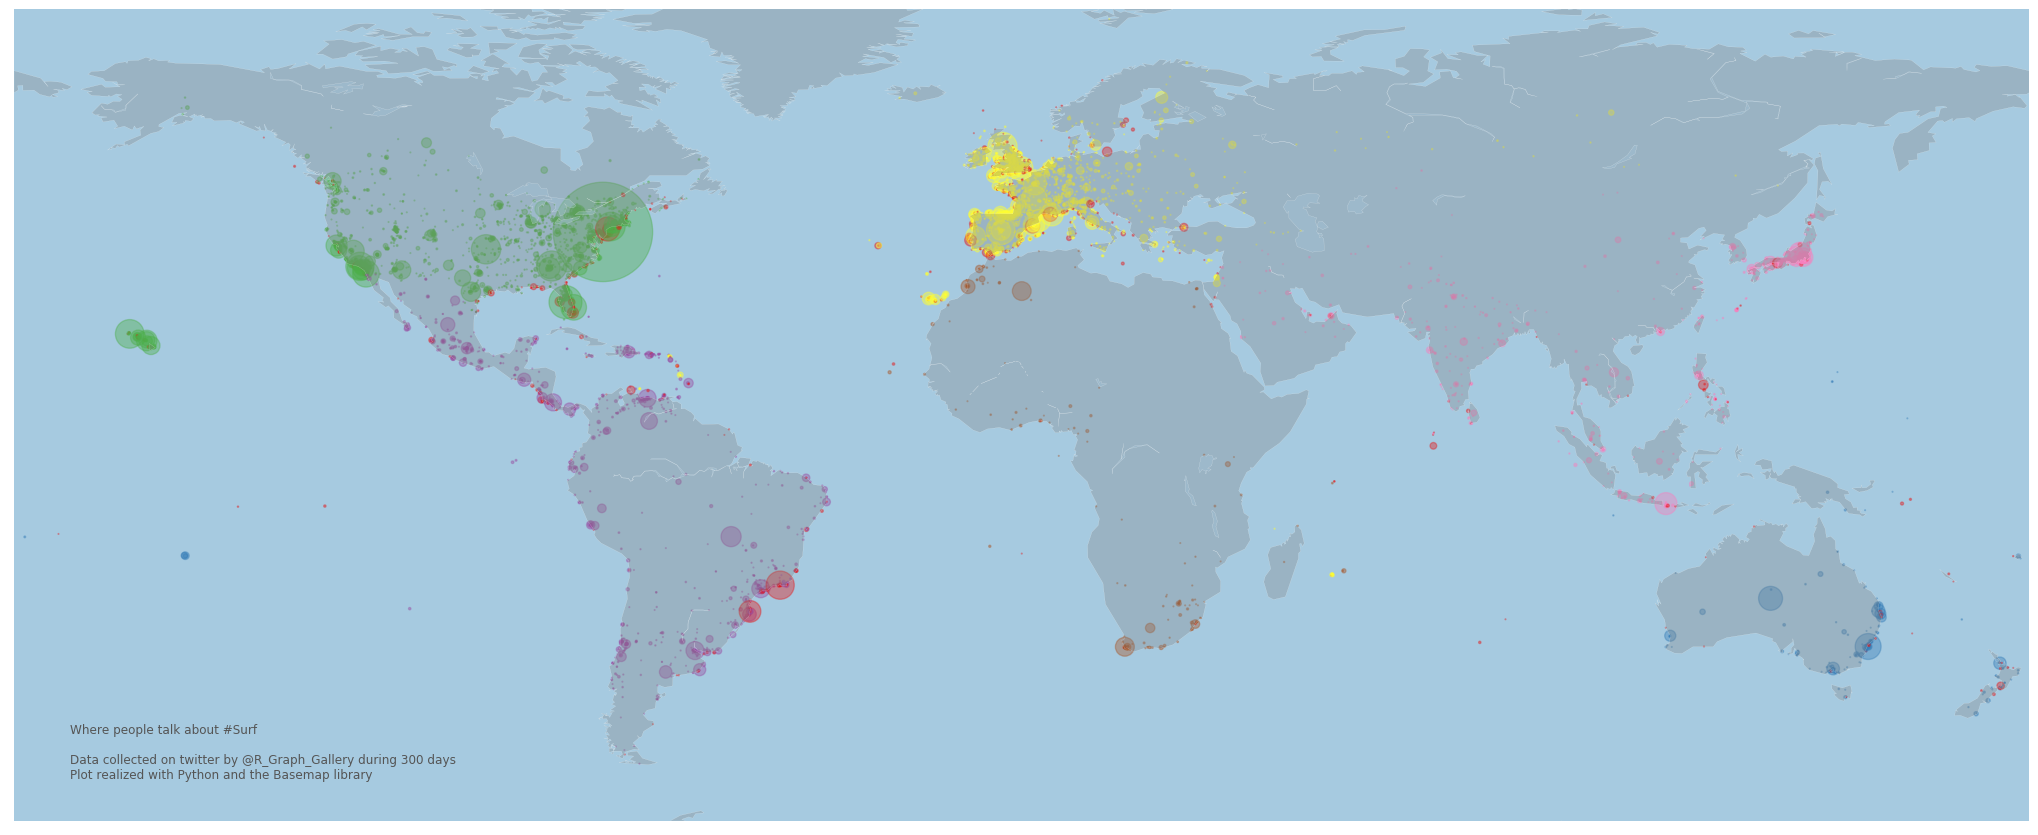

In [8]:
# Libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# Save as png
plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')


In [9]:
data

,homelon,homelat,homecontinent,n,labels_enc
0,-178.12,-14.29,Australia,10,0
1,-172.10,-13.76,NaN,2,-1
2,-159.72,21.97,NaN,6,-1
3,-159.59,21.91,North America,4,1
4,-159.53,22.10,North America,37,1
...,...,...,...,...,...
7695,177.14,-37.69,NaN,2,-1
7696,178.01,-38.13,Australia,8,0
7697,178.02,-38.66,Australia,5,0
7698,178.07,-17.71,Australia,58,0
